In [376]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 300)
# display notebook in full width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [377]:

covid = pd.read_csv('covid10May.csv')
covid.head()
covid['DeathRate%'] = covid.TotalDeaths * 100/ covid.TotalCases
covid['DeathRate%']  = covid['DeathRate%'].round(2) 

# covid['RecovryRate'] = covid.TotalRecovered * 100 /  covid.TotalCases

In [378]:
covid.shape

(214, 13)

In [379]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          214 non-null    object 
 1   TotalCases       214 non-null    int64  
 2   NewCases         16 non-null     float64
 3   TotalDeaths      177 non-null    float64
 4   NewDeaths        6 non-null      float64
 5   TotalRecovered   207 non-null    float64
 6   ActiveCases      214 non-null    int64  
 7   SeriousCritical  133 non-null    float64
 8   TotalCaserPerM   212 non-null    float64
 9   DeathsPerM       175 non-null    float64
 10  TotalTests       183 non-null    float64
 11  TestPerM         183 non-null    float64
 12  DeathRate%       177 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 21.9+ KB


## Cleaning Data

In [380]:
keep_cols = [ 'TotalCaserPerM','DeathsPerM', 'TestPerM' ,'DeathRate%']
# keep_cols = [ 'DeathsPerM', 'TestPerM' ,'DeathRate%']

display_cols = ['Country', 'TotalCases'] + keep_cols
covidCluster = covid.copy()
covidCluster[display_cols].head()

,Country,TotalCases,TotalCaserPerM,DeathsPerM,TestPerM,DeathRate%
0,USA,1347309,4070.0,242.0,26943.0,5.94
1,Spain,262783,5620.0,566.0,52781.0,10.08
2,Italy,218268,3610.0,503.0,41584.0,13.93
3,UK,215260,3171.0,465.0,25461.0,14.67
4,Russia,198676,1361.0,13.0,35783.0,0.92


In [381]:
covidCluster[covidCluster[display_cols].isna().any(axis = 1)][display_cols].head()

,Country,TotalCases,TotalCaserPerM,DeathsPerM,TestPerM,DeathRate%
10,China,82901,58.0,3.0,NaN,5.59
71,Cameroon,2274,86.0,4.0,NaN,4.75
74,Guinea,2042,155.0,0.8,NaN,0.54
88,Sudan,1164,27.0,1.0,NaN,5.50
91,Somalia,997,63.0,3.0,NaN,4.81


In [382]:
covidCluster = covidCluster[display_cols].dropna()

In [383]:
covidCluster = covidCluster[covidCluster.Country != 'San Marino']

In [384]:
# covidCluster = covidCluster.head(100)

In [385]:
# covidCluster.head(100)

## Visualizaing data

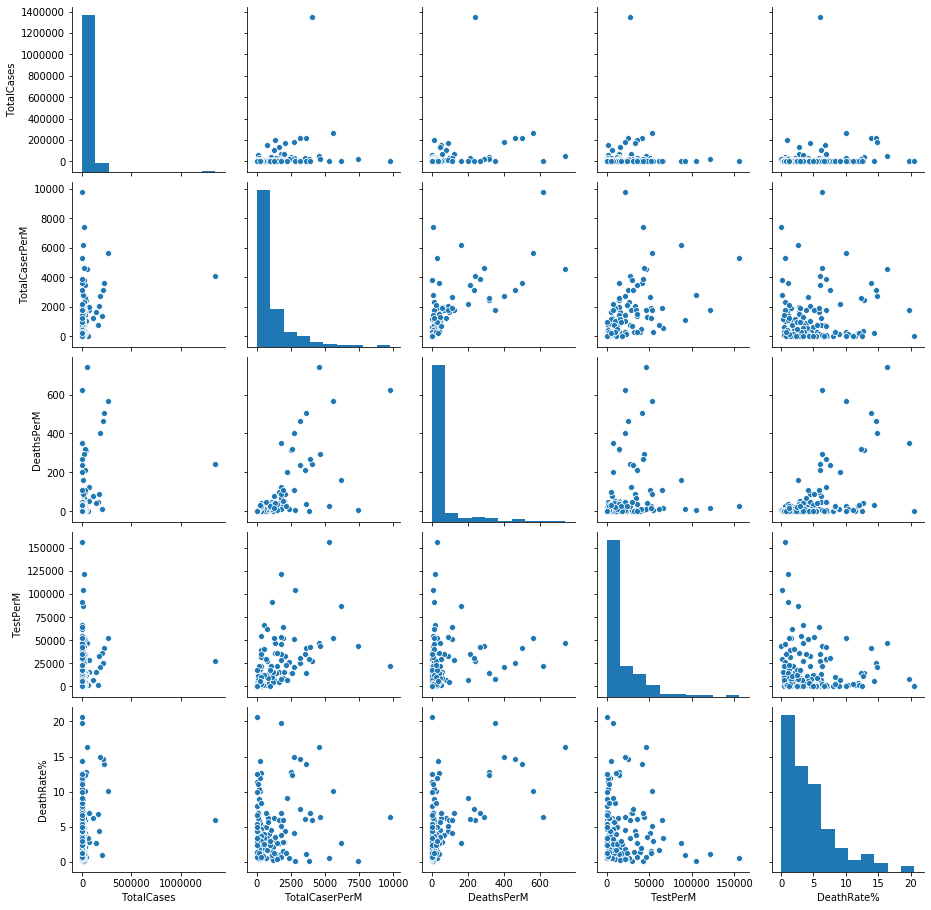

In [386]:
sns.pairplot(covidCluster)

## Kmeans

In [387]:

X = covidCluster[keep_cols]

In [388]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=2)
# covidImputed = imputer.fit_transform(covidCluster)
# pd.DataFrame(covidImputed)

In [389]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3
0,1.985711,1.545120,0.395892,0.347861
1,2.994628,4.201770,1.458438,1.370236
2,1.686290,3.685199,0.997979,2.320996
3,1.400538,3.373617,0.334947,2.503739
4,0.222383,-0.332573,0.759423,-0.891830


### Find optimal Number of Clusters

In [390]:
kmeans_per_k = [KMeans( n_clusters= k, random_state= 42).fit(X) for k in range(1, 15)]
inertias = [model.inertia_ for model in kmeans_per_k]


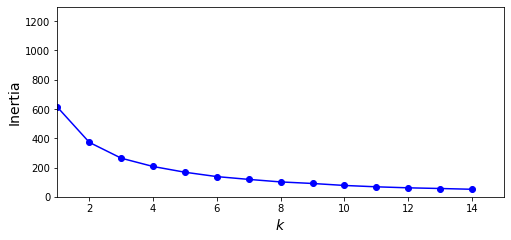

In [391]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 15), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
# plt.annotate('Elbow',
#              xy=(4, inertias[3]),
#              xytext=(0.55, 0.55),
#              textcoords='figure fraction',
#              fontsize=16,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )
plt.axis([1, 15, 0, 1300])
# save_fig("inertia_vs_k_plot")
plt.show()

In [392]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

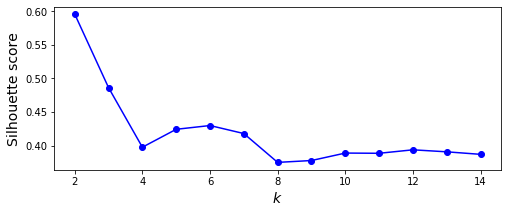

In [393]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 15), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
# plt.axis([1.8, 8.5, 0.55, 0.7])
# save_fig("silhouette_score_vs_k_plot")
plt.show()

### Run Kmeans for Optimal Clusters

In [394]:
k = 3
kmeans = KMeans(n_clusters = k, random_state= 42)
y_pred = kmeans.fit_predict(X)
y_pred

array([1, 1, 1, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0,
       1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [395]:

covidCluster['cluster'] = y_pred
covidCluster = covidCluster.sort_values(by = ['cluster', 'TotalCases'], ascending = False)
covidCluster.head()

,Country,TotalCases,TotalCaserPerM,DeathsPerM,TestPerM,DeathRate%,cluster
4,Russia,198676,1361.0,13.0,35783.0,0.92,2
6,Germany,171324,2045.0,90.0,32891.0,4.41,2
21,Portugal,27406,2688.0,110.0,50767.0,4.11,2
25,Singapore,22460,3839.0,3.0,30016.0,0.09,2
26,Belarus,22052,2334.0,13.0,26644.0,0.57,2


In [396]:
agg = {
        'Count': pd.NamedAgg(column = 'cluster', aggfunc = 'count'),
        'MeanTotalCaserPerM':pd.NamedAgg(column = 'TotalCaserPerM', aggfunc = 'mean'),
        'MeanDeathsPerM':pd.NamedAgg(column = 'DeathsPerM', aggfunc = 'mean'),
        'MeanTestPerM':pd.NamedAgg(column = 'TestPerM', aggfunc = 'mean'),
        'MeanDeathRate%':pd.NamedAgg(column = 'DeathRate%', aggfunc = 'mean'),
        
       
}
# group = covidCluster.groupby(['cluster']).agg({'cluster': 'count',  'TotalCaserPerM': 'mean', 'DeathsPerM': 'mean', 'TestPerM': 'mean', 'DeathRate':'mean'} ).rename(columns = ['1', '2', '3', '4', '5', '6'])
group = covidCluster.groupby('cluster').agg(**agg)
group.round(2)

,Count,MeanTotalCaserPerM,MeanDeathsPerM,MeanTestPerM,MeanDeathRate%
cluster,,,,,
0,112,359.67,13.14,6691.95,4.25
1,15,3839.93,382.33,28845.00,10.88
2,26,2233.81,38.00,56430.23,2.07


## Cluster 0

In [397]:
covidCluster[covidCluster.cluster == 0]

,Country,TotalCases,TotalCaserPerM,DeathsPerM,TestPerM,DeathRate%,cluster
7,Brazil,156061,734.0,50.00,1597.0,6.83,0
8,Turkey,137115,1626.0,44.00,15822.0,2.73,0
9,Iran,106220,1265.0,78.00,6825.0,6.20,0
11,Canada,67702,1794.0,124.00,28297.0,6.93,0
12,Peru,65015,1972.0,55.00,14990.0,2.79,0
13,India,62939,46.0,2.00,1166.0,3.35,0
16,Saudi Arabia,37136,1067.0,7.00,12452.0,0.64,0
17,Mexico,33460,260.0,26.00,994.0,10.02,0
19,Pakistan,29465,133.0,3.00,1284.0,2.17,0
20,Ecuador,29071,1648.0,97.00,4742.0,5.91,0


## Cluster 1

In [398]:
covidCluster[covidCluster.cluster == 1]

,Country,TotalCases,TotalCaserPerM,DeathsPerM,TestPerM,DeathRate%,cluster
0,USA,1347309,4070.0,242.0,26943.0,5.94,1
1,Spain,262783,5620.0,566.0,52781.0,10.08,1
2,Italy,218268,3610.0,503.0,41584.0,13.93,1
3,UK,215260,3171.0,465.0,25461.0,14.67,1
5,France,176658,2706.0,403.0,21213.0,14.89,1
14,Belgium,52596,4538.0,740.0,46649.0,16.31,1
15,Netherlands,42382,2473.0,316.0,14570.0,12.79,1
18,Switzerland,30251,3495.0,211.0,35383.0,6.05,1
23,Sweden,25921,2567.0,319.0,14704.0,12.42,1
24,Ireland,22760,4609.0,293.0,43493.0,6.35,1


## Cluster 2

In [399]:
covidCluster[covidCluster.cluster == 2]

,Country,TotalCases,TotalCaserPerM,DeathsPerM,TestPerM,DeathRate%,cluster
4,Russia,198676,1361.0,13.0,35783.0,0.92,2
6,Germany,171324,2045.0,90.0,32891.0,4.41,2
21,Portugal,27406,2688.0,110.0,50767.0,4.11,2
25,Singapore,22460,3839.0,3.0,30016.0,0.09,2
26,Belarus,22052,2334.0,13.0,26644.0,0.57,2
27,Qatar,21331,7404.0,5.0,43232.0,0.06,2
28,UAE,17417,1761.0,19.0,121330.0,1.06,2
29,Israel,16454,1901.0,29.0,52109.0,1.50,2
30,Austria,15833,1758.0,68.0,34608.0,3.88,2
40,Denmark,10319,1782.0,91.0,53345.0,5.10,2


In [400]:
covidCluster[covidCluster.cluster == 3]

,Country,TotalCases,TotalCaserPerM,DeathsPerM,TestPerM,DeathRate%,cluster


In [401]:
covidCluster.shape

(153, 7)

In [402]:
covidCluster.to_csv('clusters.csv')

## DBSCAN

In [403]:
from sklearn.cluster import DBSCAN

In [404]:
dbscan = DBSCAN(eps = 2, min_samples = 5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [409]:
covidCluster['cluster'] = dbscan.labels_
covidCluster = covidCluster.sort_values(by = ['cluster', 'TotalCases'], ascending = False)
covidCluster.head()

,Country,TotalCases,TotalCaserPerM,DeathsPerM,TestPerM,DeathRate%,cluster
0,USA,1347309,4070.0,242.0,26943.0,5.94,0
1,Spain,262783,5620.0,566.0,52781.0,10.08,0
2,Italy,218268,3610.0,503.0,41584.0,13.93,0
3,UK,215260,3171.0,465.0,25461.0,14.67,0
4,Russia,198676,1361.0,13.0,35783.0,0.92,0


## AgglomerativeClustering

In [410]:
from sklearn.cluster import AgglomerativeClustering

In [411]:
aggcluster = AgglomerativeClustering(n_clusters = 3, affinity= 'euclidean', linkage = 'complete')
y_pred = aggcluster.fit_predict(X)
covidCluster['cluster'] = y_pred
covidCluster = covidCluster.sort_values(by = ['cluster', 'TotalCases'], ascending = False)
covidCluster.head()

,Country,TotalCases,TotalCaserPerM,DeathsPerM,TestPerM,DeathRate%,cluster
1,Spain,262783,5620.0,566.0,52781.0,10.08,2
15,Netherlands,42382,2473.0,316.0,14570.0,12.79,2
113,Guinea-Bissau,641,326.0,2.0,762.0,0.47,2
30,Austria,15833,1758.0,68.0,34608.0,3.88,1
31,Japan,15663,124.0,5.0,1676.0,3.88,1


In [408]:
group = covidCluster.groupby('cluster').agg(**agg)
group.round(2)

,Count,MeanTotalCaserPerM,MeanDeathsPerM,MeanTestPerM,MeanDeathRate%
cluster,,,,,
0,144,984.44,50.38,16923.92,4.54
1,6,1533.00,71.33,26252.67,4.01
2,3,1667.67,170.67,18266.00,5.01
